SECTION OBJECTIVES: **K-MEANS CLUSTERING**
* Subsetting data to focus on **credit fearful** households.
* Exploring relationship between **debt** and **house values**.
* Building **unsupervised model** to divide household into groups.
* Examining **mean characteristics** of each group.

* ML WORKFLOW:
    * Preparing Data
        * Importing
        * Exploring
        * Splitting data: **NO TARGET VECTOR**
    * Building Model
        * Iterating: **K-means model, choosing number of clusters**
            * `clusters`, `centroids`, `inertia`, `silhoutte score`
    * Communicating Results
        * Cluster Centroids
        * Side-by-side bar chart: visualising difference between clusters

In [1]:
# importing necessary libraries

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Preparing Data
## 1.1 Importing

In [2]:
# Creating a wrangle function to only look at credit fearful households

def wrangle(filepath):
    df = pd.read_csv(filepath)
    mask = df['TURNFEAR'] == 1 # selecting only credit fearful households
    df = df[mask]
    return df

In [3]:
# Wrangle function in action
df = wrangle('SCFP2019.zip')
print(df.shape)
df.head()

(4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


## 1.2 Exploring Data

### Scatter Plot: House Values vs Debt

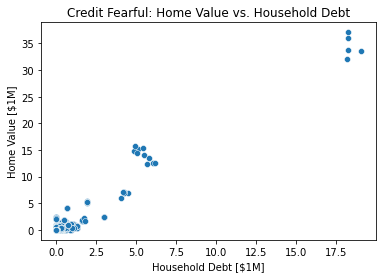

In [4]:
# plotting houses vs debt
sns.scatterplot(x = df['DEBT'] / 1e6, y = df['HOUSES'] / 1e6) # converting to millions

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

* Even with our eyes we can see a few clusters here, it would be interesting to see how K-means clusters these datapoints

## 1.3 Splitting Data
### Vertical Split
* With unsupervised learning there is no Target Vector, only a Feature Matrix.
* In *unsupervised* the model doesn't try to map input to a set of labels or targets that already exist. 
* It's kind of like how humans learn new skills: by just trying out something and observing what happens.

In [5]:
# Creating a Feature Matrix `X` with just `DEBT` and `HOUSES` as features
X = df[['DEBT', 'HOUSES']]
print(X.shape)
X.head()

(4623, 2)


,DEBT,HOUSES
5,12200.0,0.0
6,12600.0,0.0
7,15300.0,0.0
8,14100.0,0.0
9,15400.0,0.0


# 2. Building Model

| Unsupervised Learning | Supervised Learning |
| :------ | :---------- |
| Only Feature Matrix (X), but no predefined Target Vector labels |  Training Set has two parts: Feature Matrix (X) and Target Vector (y)|
| Clustering is Unsupervised | Classification is supervised |
| Clustering assigns models to groups based on their proximities to each other | The categories are already known in the Target Vector |
| **k-Means** is the algorithm used here | |
|`k` is the number of clusters/groups the algorithm is instructed to create | The number of possible groups already known|
|Think of number of clusters as a Hyperparameter to be decided before Training begins | |

### KMeans Clustering
* Imagine a set of points scattered on an XY plane
* Suppose they need to be separated into 3 groups (clusters, `k = 3`)
     * **Step 0:** Randomly assign 3 centroid to these clusters
     * 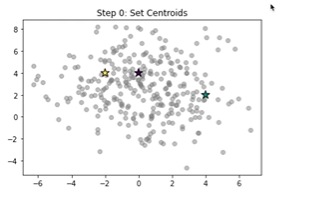
     * **Step 1:** All the data points in the plane are assigned to the centroid nearest to them
     * 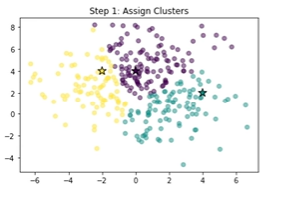
     * **Step 2:** Algorithm calculates new centroids by calculating the average of all the data points in each cluster. Thats where the `Means` in **K-Means** comes from
     * 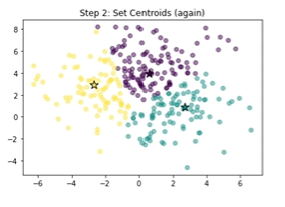
* Repeat Steps 1 and 2 over and over again to reassign the data points to the clusters based on the closest centroids in the new locations.
* After a while, the centroids, stop moving much.
* At that point the algorithm stops, and we get 3 Clusters

## 2.1 Iterating
* Building a KMeans model, assigning it to variable `model`, and fitting it to the training data `X`
* The initial centroids are set randomly in KMeans. 
* To make the process reproducible, a `random_state` parameter is used

In [6]:
# Building KMeans model, with 3 clusters
model = KMeans(n_clusters = 3, random_state = 108)
# Fitting model to data
model.fit(X)

KMeans(n_clusters=3, random_state=108)

### Extracting Cluster Labels

In [8]:
# in sklearn, an attribute followed by an underscore `_` implies that attribute can't be accessed before the model has been trained
labels = model.labels_
# Checking first 10 observations
labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Extracting Centroids

In [13]:
centroids = model.cluster_centers_
centroids

array([[   91017.57766674,   116150.29328699],
       [18384100.        , 34484000.        ],
       [ 5065800.        , 11666666.66666667]])

* Each row is a centroid, with X and Y coordinates

### Plotting Clusters & Centroids

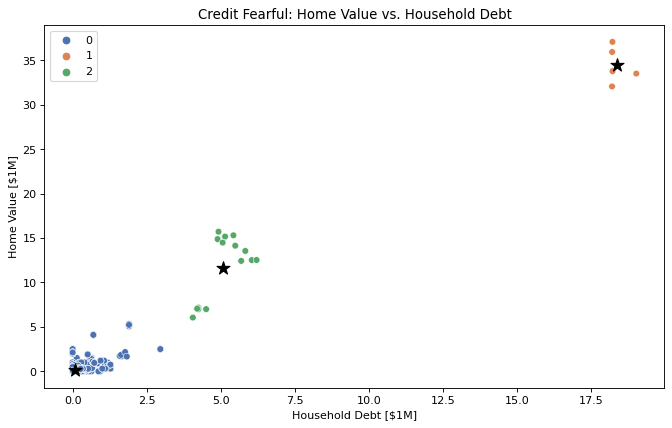

In [25]:
# Plotting 'HOUSES' vs 'DEBT' with hue = label
plt.figure(figsize = (10,6), dpi = 80)
sns.scatterplot(
    x = df['DEBT'] / 1e6,
    y = df['HOUSES'] / 1e6,
    hue = labels,
    palette = 'deep'
)
# Plotting centroids
plt.scatter(
    x = centroids[:, 0] / 1e6, # getting all values from column 1
    y = centroids[:, 1] / 1e6, # values from column 2
    color = 'black',
    marker = '*',
    s = 150 # size of marker
)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

## 2.2 Evaluating Clusters
### Inertia
* **Inertia** measures the distance between the points and the centroid within the same cluster
* It measures how internally coherent the clusters are
* Inertia is also known as **within-cluster sum of squares**
* Smaller inertia means a tighter cluster of datapoints
* Smaller is better
* Unit of measurement for inertia is same as the measurement unit for data

In [22]:
# Calculating inertia
inertia = model.inertia_
print('Inertia (3 Clusters):', inertia)

Inertia (3 Clusters): 939554010797047.0


### Silhouette Score
* Another distance based metric used to evaluate models
* **`Inertia` evaluates the `internal` consistency of a cluster**
* **`Sihouette Score` measures distance `between` clusters**
* It ranges from **-1(worst)** to **+1 (the best)**
* 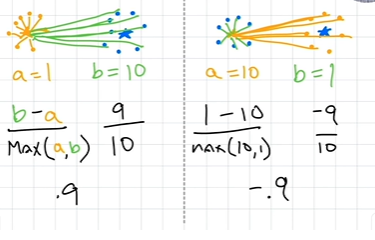
* `a` is the avg. distance between centroid and its own data points
* `b` is the avg. distance between centroid and other data points not in that particular cluster
* On left is an example of a good silhouette score

In [23]:
# Calculating silhouette score, assigning it to variable `ss
ss = silhouette_score(X, model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.9768842462944348


* 0.976 is really close to 1, which means that the model has done a good job at identifying 3 clusters which are far away from each other
* In Unsupervised Learning, the number of clusters is a Hyperparameter which is set before training model
* If number of clusters changes, performance could improve

## 2.3 Finding the best `K`
* iterating over a range of K values (2 - 12) and appending scores to lists `inertia_errors` and `silhouette_scores`

In [24]:
# Specifying a range of cluster values
n_clusters = range(2, 13, 1)
# Creating empty lists
inertia_errors = []
silhouette_scores = []

# Adding a for loop to train model and calculating inertia, silhouette scores
for k in n_clusters:
    # Building model
    model = KMeans(n_clusters = k, random_state = 108)
    # Training model
    model.fit(X)
    # Calculating inertia and appending to the empty list
    inertia_errors.append(model.inertia_)
    # Calculating silhouette score and appending to empty list
    silhouette_scores.append(silhouette_score(X, model.labels_))
    
print('Inertia:', inertia_errors)
print()
print('Silhouette Scores:', silhouette_scores)

Inertia: [3304291266370105.5, 939554010797047.1, 546098841715653.75, 309310386410919.4, 235232984197253.03, 182255493204378.66, 150523486517144.06, 114320923409108.98, 100416970564353.97, 87227123944079.0, 73303396868851.66]

Silhouette Scores: [0.9904780333746295, 0.9768842462944348, 0.9490311483406091, 0.839330043242819, 0.7286388159472001, 0.726631658478457, 0.7297230907370718, 0.7327976378101695, 0.7332097804619855, 0.6950048914914997, 0.6948382756968329]


### Inertia vs Clusters
Plotting `inertia_errors` by `n_clusters`

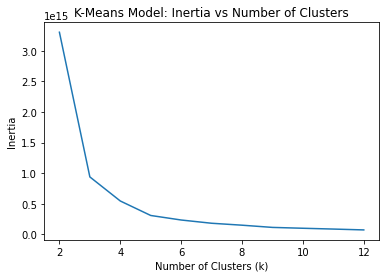

In [28]:
plt.plot(n_clusters, inertia_errors)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means Model: Inertia vs Number of Clusters');

* With increasing clusters number, inertia gets smaller
* But ever increasing clusters does not seem very practical
* The trick is to look for the point of bend in this plot **Elbow Plot** after which the returns begin to diminish
* Here it is somewhere between 4 or 5
* There is not one definite answer to how many clusters should the model have
* Unsupervised Learning is often more subjective

### Silhouette Score vs Clusters

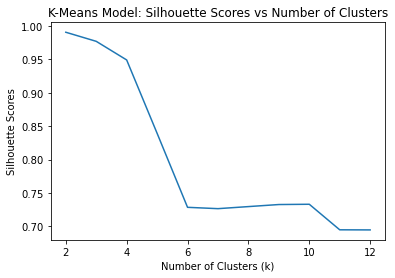

In [29]:
# plotting`silhouette_scores` vs `n_clusters`
plt.plot(n_clusters, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.title('K-Means Model: Silhouette Scores vs Number of Clusters');

* Moving from left to right, the number of clusters get bigger
* Higher up on the Y axis is the score which is desirable
* The plot is zagged
* Choosing between 4 or 5 is a no-brainer. 4 is the better score
* So information from **Inertia** and **Silhouette Scores** suggests that `k = 4` is the most optimal choice of clusters

## 2.4 Building Final Model

In [30]:
# Building Model with `k = 4`
final_model = KMeans(n_clusters = 4, random_state = 108)
# Fitting model to data
final_model.fit(X)

KMeans(n_clusters=4, random_state=108)

# 3. Communicating Results
## Plotting Final Clusters

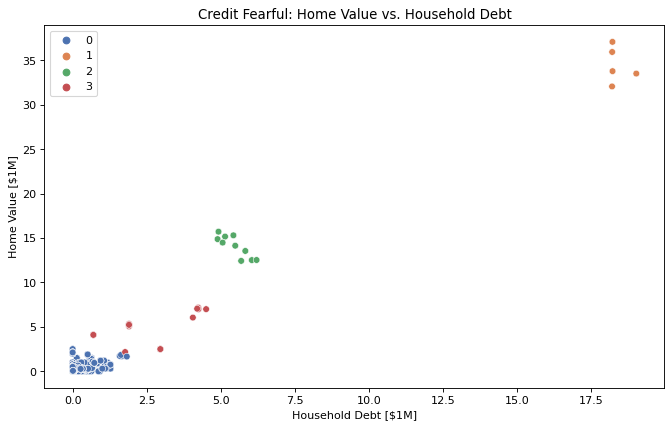

In [33]:
# Plotting "HOUSES" vs "DEBT" with final_model labels
plt.figure(figsize = (10,6), dpi = 80)
sns.scatterplot(
    x = df['DEBT'] / 1e6,
    y = df['HOUSES'] / 1e6,
    hue = final_model.labels_,
    palette = 'deep',
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

## Side-by-Side Bar Chart

### Getting Centroids
Creating a DataFrame `xgb` that contains the mean `"DEBT"` and `"HOUSES"` values for each of the clusters in `final_model`.


In [34]:
xgb = X.groupby(final_model.labels_).mean()
xgb

,DEBT,HOUSES
0,8.488629e+04,1.031872e+05
1,1.838410e+07,3.448400e+07
2,5.472800e+06,1.407400e+07
3,2.420929e+06,4.551429e+06


In [35]:
final_model.cluster_centers_

array([[   84886.28951384,   103187.22476564],
       [18384100.        , 34484000.        ],
       [ 5472800.        , 14074000.        ],
       [ 2420928.57142857,  4551428.57142857]])

**It can be seen that cluster centers for final model are the same as mean values for each cluster**

### Building BarChart

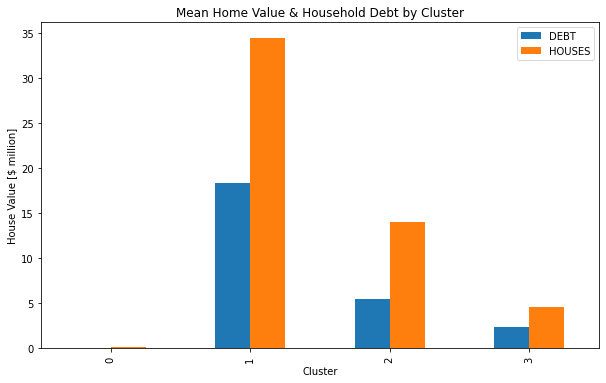

In [47]:
# Creating side-by-side bar chart of `xgb`
(xgb / 1e6).plot(kind = 'bar', figsize = (10,6))
plt.xlabel("Cluster")
plt.ylabel("House Value [$ million]")
plt.title("Mean Home Value & Household Debt by Cluster");

* There are 4 different clusters created by model
* Blue values represent Household Debt
* Orange is House Values
* Group 0 - Lowest Mean Value of Houses
* Group 1 - Highest Mean House Value

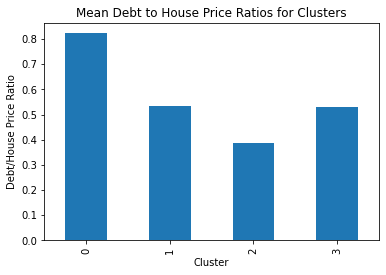

In [51]:
# Mean Debt to House Price for Clusters Plot
(xgb['DEBT'] / xgb['HOUSES']).plot(
    kind = 'bar',
    xlabel = 'Cluster',
    ylabel = 'Debt/House Price Ratio',
    title = 'Mean Debt to House Price Ratios for Clusters'
);

* It turns out that for Group 0 households in credit fearful group, their major source of debt is tied up to their house mortgage
    * They could be targeted for mortgage refinancing to lower their interest rate
* Group 2 has the smallest proportion of Debt to House Value
    * They could be interested in a Home Equity Line of Credit
* Group 1 and 3 have moderate amount of untapped equity in their homes
    * They could be targeted for personalised wealth management